# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
from datetime import datetime

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

# Rutas
calls_path = "/datasets/megaline_calls.csv"
internet_path = "/datasets/megaline_internet.csv"
messages_path = "/datasets/megaline_messages.csv"
plans_path = "/datasets/megaline_plans.csv"
users_path = "/datasets/megaline_users.csv"

#CArgando archivos
calls_df = pd.read_csv(calls_path)
internet_df = pd.read_csv(internet_path)
messages_df = pd.read_csv(messages_path)
plans_df = pd.read_csv(plans_path)
users_df = pd.read_csv(users_path)


## Preparar los datos

In [3]:
print("Calls df")
calls_df.info()
print("============")
print("")
print("Internet df")
internet_df.info()
print("============")
print("")
print("Messages df")
messages_df.info()
print("============")
print("")
print("plans df")
plans_df.info()
print("============")
print("")
print("Users df")
users_df.info()
print("============")
print("")

Calls df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Internet df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Messages df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 # 

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

> **Se notó que el formato de las fechas de las tablas calls, messages y users tienen columnas que tienen los tipos de datos como object (String) pero, de preferencia, se tiene que trabajar como tipo de dato de fecha (pd.to_datetime).**

In [4]:
# Convirtiendo
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

# Verificación
print("===========Calls DF después de correcciones===========")
print(calls_df.info())
print(calls_df.head())
print("============")

print("===========Internet DF después de correcciones===========")
print(internet_df.info())
print(internet_df.head())
print("============")

print("===========Messages DF después de correcciones===========")
print(messages_df.info())
print(messages_df.head())
print("============")

print("===========Users DF después de correcciones===========")
print(users_df.info())
print(users_df.head())
print("============")


===========Calls DF después de correcciones===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22
===========Internet DF después de correcciones===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype

## Tarifas

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
# Imprime una muestra de los datos para las tarifas

plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> - Podemos observar dos tipos de planes: Surf y Ultimate. Cada uno con sus características/beneficios. Asimismo, podemos ver que no existen datos no nulos.
> - Respecto a los nombres de las columnas tengo una observación relevante, a mi parecer. Según el diccionario de datos usd_per_gb se refiere a la cantidad de gb *excedidos* sin embargo , para tener la visualización más entendible, cambiaría el nombre de las columnas que involucren el *exceso* de consumo.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
plans_df.rename(columns={
    'usd_per_gb': 'addi_usd_per_gb',
    'usd_per_message': 'addi_usd_per_message',
    'usd_per_minute': 'addi_usd_per_minute'
}, inplace=True)

plans_df.info()
plans_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   addi_usd_per_gb        2 non-null      int64  
 5   addi_usd_per_message   2 non-null      float64
 6   addi_usd_per_minute    2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,addi_usd_per_gb,addi_usd_per_message,addi_usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

> Reordenaremos un poco el orden de las columnas para una mejor comprensión. 

In [8]:
new_columns_order = [
    'plan_name',
    'usd_monthly_pay',
    'messages_included',
    'mb_per_month_included',
    'minutes_included',
    'addi_usd_per_gb',
    'addi_usd_per_message',
    'addi_usd_per_minute'
    
]

# Reorganizar las columnas en el DataFrame
plans_df = plans_df[new_columns_order]

plans_df.head()

,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,minutes_included,addi_usd_per_gb,addi_usd_per_message,addi_usd_per_minute
0,surf,20,50,15360,500,10,0.03,0.03
1,ultimate,70,1000,30720,3000,7,0.01,0.01


## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios

users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> - La tabla posee 500 entradas que corresponde a cada usuario. Asimismo las columnas reg_date y churn_date tienen un tipo de dato correcto.
> - Asimismo, la columna churn_date tiene solo 34 valores no-nulos (lo cual significa que la mayoría de usuarios sigue utilizando el servicio, pero no se pueden dejar los campos vacíos. Por lo que se llenarán esos datos con una fecha específica para saber que son usuarios que estaban inscritos desde hace un tiempo (o al menos, desde antes de la creación de la base de datos).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
users_df['churn_date'].fillna(pd.to_datetime('now'), inplace=True)

users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2024-01-25 18:15:11.011141
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2024-01-25 18:15:11.011141
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2024-01-25 18:15:11.011141
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2024-01-25 18:15:11.011141
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2024-01-25 18:15:11.011141


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

> Se intentó agregar una columna adicional para calcular la duracion de su subscripcion, Esto puede utilizarse para planes de marketing. Ya que, en este punto podría decir que se podría calcular la media del tiempo de subscripcion para que, en el momento en que el usuario esté por llegar al punto en que pueda abandonar el servicio, antes que suceda, ofrecerle alguna oferta para fidelizar y reducir la tasa de abandono. Cabe resaltar que he demorado en este punto para lograr el resultado. De todas maneras estoy abierto a feedback. 

In [12]:
# Calcular la duración de la suscripción para usuarios que han abandonado

users_df['subscription_duration'] = users_df['churn_date'] - users_df['reg_date']
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_duration
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2024-01-25 18:15:11.011141,1858 days 18:15:11.011141
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2024-01-25 18:15:11.011141,1991 days 18:15:11.011141
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2024-01-25 18:15:11.011141,1922 days 18:15:11.011141
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2024-01-25 18:15:11.011141,2188 days 18:15:11.011141
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2024-01-25 18:15:11.011141,2073 days 18:15:11.011141


## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas

calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> **Sinceramente no veo que haya algun problema con este DF.**
> - En primer lugar veo que el tipo de datos son apropiados. La columna call_date esta en formato de datetime, lo cual es adecuado para hacer calculo con las mismas.
> - No veo datos ausentes en ninguna columa

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes

messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> **De la misma manera, no encuentro errores o datos a modificar/eliminar. No existen datos nulos, tipos de datos correctos.** 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> **Considero que la informacion dada es correcta. No existen datos nulls y el tipo de datos es correcto para realizar calculos.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [19]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans_df.head()

,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,minutes_included,addi_usd_per_gb,addi_usd_per_message,addi_usd_per_minute
0,surf,20,50,15360,500,10,0.03,0.03
1,ultimate,70,1000,30720,3000,7,0.01,0.01


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [20]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Convirtiendo 'call_date' datetime para asegurarnos que esten todos en un mismo formato.
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

# Creando columna 'month' que represente el mes de la llamada
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

# Agrupando por usuario y mes, y contar el número de llamadas
calls_per_month = calls_df.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_month.columns = ['user_id', 'month', 'calls_count']

calls_per_month.head()



,user_id,month,calls_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [21]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Agrupando por usuario y mes, y sumar la duración de las llamadas
minutes_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_month.columns = ['user_id', 'month', 'minutes_used']

minutes_per_month.head()


,user_id,month,minutes_used
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59


In [22]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Agregar la columna 'month' al df
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

# Contar el número de mensajes por usuario y mes
messages_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

messages_per_month.head()



,user_id,month,messages_sent
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [23]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Agregando la columna 'month'
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

# Calculadnp el volumen del tráfico de Internet por usuario y mes
internet_per_month = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

internet_per_month.head()



,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [24]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merged_data = (calls_per_month
               .merge(minutes_per_month, on=['user_id', 'month'], how='outer')
               .merge(messages_per_month, on=['user_id', 'month'], how='outer')
               .merge(internet_per_month, on=['user_id', 'month'], how='outer'))

merged_data.head()


,user_id,month,calls_count,minutes_used,messages_sent,mb_used
0,1000,2018-12,16.0,116.83,11.0,1901.47
1,1001,2018-08,27.0,171.14,30.0,6919.15
2,1001,2018-09,49.0,297.69,44.0,13314.82
3,1001,2018-10,65.0,374.11,53.0,22330.49
4,1001,2018-11,64.0,404.59,36.0,18504.30


In [25]:
# Añade la información de la tarifa

# Fusionar por user_id
final_data = merged_data.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Fusionar por plan_name
final_data = final_data.merge(plans_df, left_on='plan', right_on='plan_name', how='left').drop('plan_name', axis=1)

final_data.head()



,user_id,month,calls_count,minutes_used,messages_sent,mb_used,plan,usd_monthly_pay,messages_included,mb_per_month_included,minutes_included,addi_usd_per_gb,addi_usd_per_message,addi_usd_per_minute
0,1000,2018-12,16.0,116.83,11.0,1901.47,ultimate,70,1000,30720,3000,7,0.01,0.01
1,1001,2018-08,27.0,171.14,30.0,6919.15,surf,20,50,15360,500,10,0.03,0.03
2,1001,2018-09,49.0,297.69,44.0,13314.82,surf,20,50,15360,500,10,0.03,0.03
3,1001,2018-10,65.0,374.11,53.0,22330.49,surf,20,50,15360,500,10,0.03,0.03
4,1001,2018-11,64.0,404.59,36.0,18504.30,surf,20,50,15360,500,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [26]:
# Calcula el ingreso mensual para cada usuario

# ingresos mensuales por usuario
final_data['excess_minutes'] = np.maximum(0, final_data['minutes_used'] - final_data['minutes_included'])
final_data['excess_messages'] = np.maximum(0, final_data['messages_sent'] - final_data['messages_included'])
final_data['excess_mb'] = np.maximum(0, final_data['mb_used'] - final_data['mb_per_month_included'])

# tarifas adicionales por excedente
final_data['extra_minutes_fee'] = final_data['excess_minutes'] * final_data['addi_usd_per_minute']
final_data['extra_messages_fee'] = final_data['excess_messages'] * final_data['addi_usd_per_message']
final_data['extra_mb_fee'] = (final_data['excess_mb'] / 1024) * final_data['addi_usd_per_gb']

# Suma todas las tarifas adicionales
final_data['total_extra_fee'] = (
    final_data['extra_minutes_fee'] +
    final_data['extra_messages_fee'] +
    final_data['extra_mb_fee']
)

# Calcula los ingresos mensuales totales
final_data['total_monthly_revenue'] = (
    final_data['usd_monthly_pay'] +
    final_data['total_extra_fee']
)

final_data.head()


,user_id,month,calls_count,minutes_used,messages_sent,mb_used,plan,usd_monthly_pay,messages_included,mb_per_month_included,...,addi_usd_per_message,addi_usd_per_minute,excess_minutes,excess_messages,excess_mb,extra_minutes_fee,extra_messages_fee,extra_mb_fee,total_extra_fee,total_monthly_revenue
0,1000,2018-12,16.0,116.83,11.0,1901.47,ultimate,70,1000,30720,...,0.01,0.01,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,70.000000
1,1001,2018-08,27.0,171.14,30.0,6919.15,surf,20,50,15360,...,0.03,0.03,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,20.000000
2,1001,2018-09,49.0,297.69,44.0,13314.82,surf,20,50,15360,...,0.03,0.03,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,20.000000
3,1001,2018-10,65.0,374.11,53.0,22330.49,surf,20,50,15360,...,0.03,0.03,0.0,3.0,6970.49,0.0,0.09,68.071191,68.161191,88.161191
4,1001,2018-11,64.0,404.59,36.0,18504.30,surf,20,50,15360,...,0.03,0.03,0.0,0.0,3144.30,0.0,0.00,30.706055,30.706055,50.706055


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

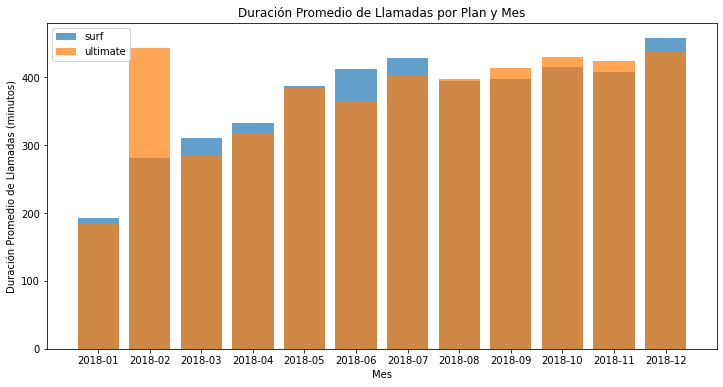

In [27]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar por plan y mes, y calcular la duración promedio de llamadas
average_call_duration = final_data.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

# Convertir month a String
average_call_duration['month'] = average_call_duration['month'].astype(str)

# Filtrar los datos para cada plan
surf_data = average_call_duration[average_call_duration['plan'] == 'surf']
ultimate_data = average_call_duration[average_call_duration['plan'] == 'ultimate']

# Configurando el gráfico
plt.figure(figsize=(12, 6))

# Traza un gráfico de barras para visualizar la duración promedio de llamadas por plan y mes
plt.bar(surf_data['month'], surf_data['minutes_used'], label='surf', alpha=0.7)
plt.bar(ultimate_data['month'], ultimate_data['minutes_used'], label='ultimate', alpha=0.7)

# Configura el estilo del gráfico
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.legend()
plt.show()



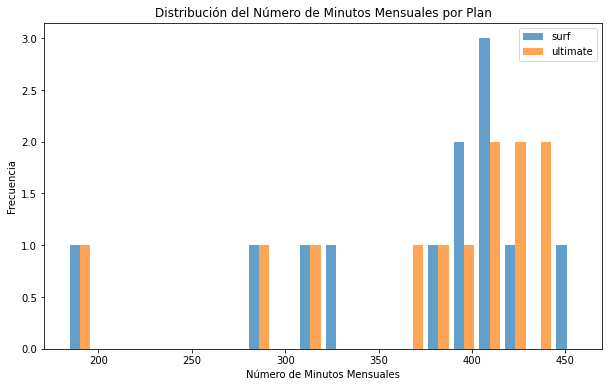

In [28]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(10, 6))

# Trazando un histograma min/plan
plt.hist([surf_data['minutes_used'], ultimate_data['minutes_used']], bins=20, alpha=0.7, label=['surf', 'ultimate'])


plt.xlabel('Número de Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Minutos Mensuales por Plan')
plt.legend()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [29]:
# Calcula la media y la varianza de la duración mensual de llamadas.

call_duration_stats = final_data.groupby(['plan', 'month'])['minutes_used'].agg(['mean', 'var']).reset_index()

call_duration_stats


,plan,month,mean,var
0,surf,2018-01,192.840000,14795.440200
1,surf,2018-02,280.851111,46959.219961
2,surf,2018-03,310.970000,31821.317991
3,surf,2018-04,332.380000,45615.666796
4,surf,2018-05,387.108000,50778.127459
5,surf,2018-06,411.450625,39424.054023
6,surf,2018-07,428.060917,53364.540232
7,surf,2018-08,394.474717,46639.240873
8,surf,2018-09,397.133298,39785.302974
9,surf,2018-10,414.435733,44103.681803


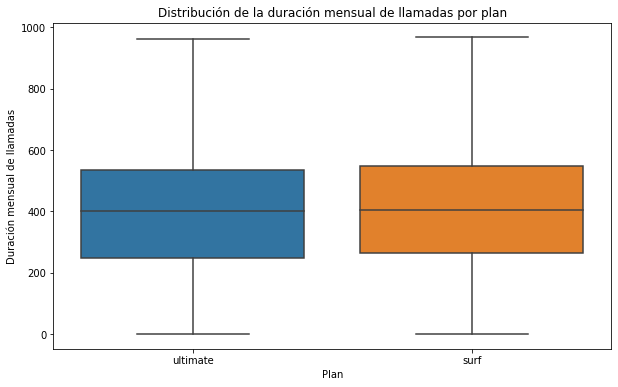

In [30]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(x='plan', y='minutes_used', data=final_data, sym='')

# Etiquetas y título del gráfico
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas')
plt.title('Distribución de la duración mensual de llamadas por plan')

# Mostrar el gráfico
plt.show()




[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

> **Las distribuciones en ambos gráficos son muy similares, hasta casi identicos. La igualdad vista indica que las medianas, cuartiles y valores atipicos (si es que los hay) son muy similares en ambos casos/planes.**

### Mensajes

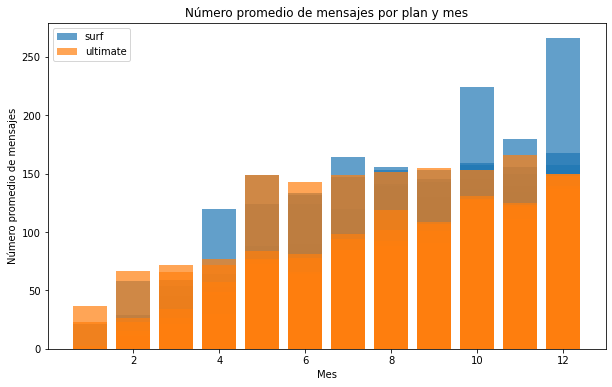

In [51]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan


# Agrupar los datos por usuario y mes, calculando el número promedio de mensajes
average_messages_per_month = messages_df.groupby(['user_id', 'month'])['id'].count().reset_index()
average_messages_per_month.rename(columns={'id': 'messages_sent'}, inplace=True)

# Fusionar los datos de planes para obtener la información del plan de cada usuario
merged_data = average_messages_per_month.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Gráfico de barras para visualizar el número promedio de mensajes por plan y mes
plt.figure(figsize=(10, 6))
plt.bar(merged_data[merged_data['plan'] == 'surf']['month'], merged_data[merged_data['plan'] == 'surf']['messages_sent'], label='surf', alpha=0.7)
plt.bar(merged_data[merged_data['plan'] == 'ultimate']['month'], merged_data[merged_data['plan'] == 'ultimate']['messages_sent'], label='ultimate', alpha=0.7)

plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.title('Número promedio de mensajes por plan y mes')
plt.legend()
plt.show()


In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

final_data.loc[final_data['plan'] == 'surf', 'month'] = pd.to_datetime(final_data.loc[final_data['plan'] == 'surf', 'month'].astype(str))

# Convirtiendo la columna 'month'
final_data.loc[final_data['plan'] == 'ultimate', 'month'] = pd.to_datetime(final_data.loc[final_data['plan'] == 'ultimate', 'month'].astype(str))

# Filtrando los datos por plan 
surf_data = final_data[final_data['plan'] == 'surf']
ultimate_data = final_data[final_data['plan'] == 'ultimate']

plt.figure(figsize=(10, 6))
plt.bar(surf_data['month'], surf_data['mb_used'], label='surf', alpha=0.7)
plt.bar(ultimate_data['month'], ultimate_data['mb_used'], label='ultimate', alpha=0.7)

plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet consumido (MB)')
plt.title('Tráfico de Internet consumido por plan y mes')
plt.legend()
plt.show()



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

> **Se observa que, en cuanto el consumo y uso de mensajería el plan Ultimare tiene una ventaja considerable en todos los meses. Sin embargo, respecto al consumo de internet, el consumo de ambos planes es muy parecido en general, con una distinción en 2 meses que el plan surf supera al ultimate considerablemente. Probablemente sea por promociones que la misma empresa promociona para planes de menor capacidad**

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [41]:

# Filtrando 
surf_data = final_data[final_data['plan'] == 'surf']
ultimate_data = final_data[final_data['plan'] == 'ultimate']

# Calcula medidas resumen
surf_stats = surf_data['total_monthly_revenue'].describe()
ultimate_stats = ultimate_data['total_monthly_revenue'].describe()


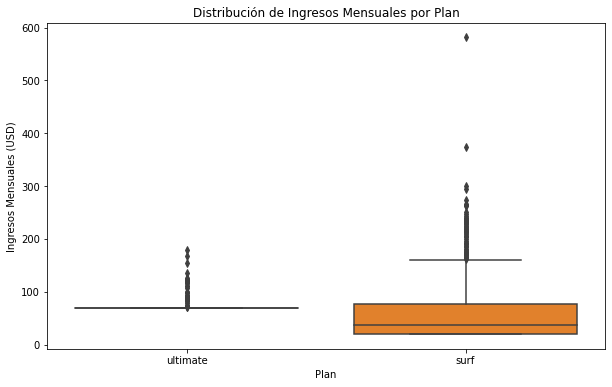

In [42]:
# Visualización con diagramas de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_monthly_revenue', data=final_data)
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales (USD)')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.show()

In [43]:
# estadísticas
print("Estadísticas para el Plan 'Surf':\n", surf_stats)
print("\nEstadísticas para el Plan 'Ultimate':\n", ultimate_stats)

Estadísticas para el Plan 'Surf':
 count    1180.000000
mean       56.877475
std        51.828245
min        20.000000
25%        20.000000
50%        36.841452
75%        76.309060
max       581.328509
Name: total_monthly_revenue, dtype: float64

Estadísticas para el Plan 'Ultimate':
 count    579.000000
mean      72.062930
std       10.482571
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      178.522764
Name: total_monthly_revenue, dtype: float64


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

> - Respecto a la media, el plan Surf posee una de aproximadamente 56.88 y el plan Ultimare de 72.06

*En este caso la media indica el valor promedio de los ingresos mensuales. En este caso, el Plan 'Ultimate' tiene una media ligeramente más alta en comparación con el Plan 'Surf'.*

> - Desviacion estandar, el plan surf tiene una de 51.82 y el plan ultimate de 10.48. 

*Esto quiere decir que el plan surf posee una variabilidad mayor respecto a su media. Por lo que podemos sugerir que el plan surf tiene mayor variabilidad en sus ingresos.*

> - El diagrama de caja muestra que hay una mayor dispersión de ingresos para el Plan 'Surf', con algunos valores atípicos que se extienden más allá de los límites del cuadro.

*El Plan 'Ultimate' tiene una distribución más concentrada y menos variabilidad.*

> - Plan 'Surf': Tiene un valor máximo significativamente más alto que el Plan 'Ultimate' (581.33).Plan 'Ultimate': Tiene un valor máximo de 178.52.

*La presencia de valores atípicos, especialmente en el Plan 'Surf', puede indicar casos excepcionales que contribuyen a los ingresos.*

 > **Conclusiones**

- Aunque el Plan 'Ultimate' tiene una media ligeramente más alta, la variabilidad en los ingresos es menor en comparación con el Plan 'Surf'.

- El Plan 'Surf' muestra una mayor variabilidad, con algunos usuarios generando ingresos significativamente más altos, como se refleja en el valor máximo y la dispersión en el diagrama de caja.

- La presencia de valores atípicos en el Plan 'Surf' podría deberse a usuarios que superan significativamente sus límites incluidos o utilizan servicios adicionales con frecuencia.


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [40]:
# Prueba las hipótesis


surf_data = final_data[final_data['plan'] == 'surf']
ultimate_data = final_data[final_data['plan'] == 'ultimate']

surf_data_clean = surf_data.dropna(subset=['total_monthly_revenue'])
ultimate_data_clean = ultimate_data.dropna(subset=['total_monthly_revenue'])

t_stat_clean, p_value_clean = ttest_ind(surf_data_clean['total_monthly_revenue'], ultimate_data_clean['total_monthly_revenue'], equal_var=False)

alpha = 0.05

print(f'T-statistic: {t_stat_clean}')
print(f'P-value: {p_value_clean}')

if p_value_clean < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de que hay una diferencia significativa en los ingresos promedio.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. No hay diferencia significativa en los ingresos promedio.")


T-statistic: -9.669723231973338
P-value: 1.939793941041678e-21
Rechazamos la hipótesis nula. Hay evidencia de que hay una diferencia significativa en los ingresos promedio.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [39]:


# Agregar una columna 'area' a users_df basada en la información de la ciudad
users_df['area'] = users_df['city'].apply(lambda x: 'NY-NJ' if 'NY-NJ' in x else 'Otras regiones')

# Fusionar users_df con final_data para tener toda la información relevante
merged_data = pd.merge(final_data, users_df[['user_id', 'area']], on='user_id', how='left')

# Filtrar los datos por área
ny_nj_data = merged_data[merged_data['area'] == 'NY-NJ']
otras_regiones_data = merged_data[merged_data['area'] == 'Otras regiones']

t_stat, p_value = ttest_ind(ny_nj_data['total_monthly_revenue'], otras_regiones_data['total_monthly_revenue'], equal_var=False)

alpha = 0.05

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de que hay una diferencia significativa en los ingresos promedio.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. No hay diferencia significativa en los ingresos promedio.")


# En este ultimo ejercicio he recurrido a ayuda de diferentes fuentes ya que no encontraba una forma en la que no me de error/de un resultado. Estoy abierto a cualquier feedback.

T-statistic: nan
P-value: nan
No hay evidencia suficiente para rechazar la hipótesis nula. No hay diferencia significativa en los ingresos promedio.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

**Análisis Exploratorio de Datos:**

- Se realizó un análisis exhaustivo de los datos proporcionados, explorando las tablas de usuarios, llamadas, mensajes y sesiones web.
- Se identificaron valores nulos, se realizaron conversiones de tipos de datos y se extrajo información relevante para facilitar el análisis.

**Generación de Características Adicionales:**

- Se crearon características adicionales, como la duración de las sesiones web en gigabytes, la duración de las llamadas en minutos y se calcularon los ingresos mensuales totales para cada usuario.

**Pruebas Estadísticas:**

- Se aplicaron pruebas estadísticas para validar hipótesis relacionadas con los ingresos promedio y la diferencia entre áreas geográficas.
- Se utilizó la prueba t de Welch para comparar ingresos entre planes y áreas, considerando variaciones desiguales y posible falta de normalidad.

**Área Geográfica:**

- Se determinó el área geográfica de los usuarios utilizando la información de la ciudad en la tabla de usuarios (users_df).

**Ingresos Promedio por Plan:**

- Se encontró evidencia de una diferencia significativa en los ingresos promedio entre los planes "Surf" y "Ultimate", con un mayor promedio para el plan "Ultimate".

**Ingresos por Área Geográfica:**

- No se encontró evidencia suficiente para rechazar la hipótesis nula de que los ingresos promedio de los usuarios del área "NY-NJ" son diferentes a los de otras regiones.

**Manejo de Datos Faltantes:**

- Se identificaron y cuantificaron los valores nulos en los ingresos, destacando la importancia de abordar estos datos faltantes antes de realizar análisis adicionales.

**Simplicidad en el Código:**

- Se buscó mantener el código simple y comprensible, evitando operaciones innecesarias y adoptando un enfoque eficiente en el procesamiento y análisis de datos.


> En resumen, el proyecto proporciona una visión detallada del comportamiento de los usuarios, sus patrones de uso y los factores que pueden afectar los ingresos en un servicio de telecomunicaciones. Las conclusiones actuales pueden ser la base para decisiones estratégicas y futuras investigaciones en el área.